## Observations and Insights


In [29]:
## Here are my overall observations ##

print("1) The heavier the mouse, the larger the tumour is the trend shown for those tested with Capomulin R-squared 0.709")
print("2) Capomulin appears to be the most effective at limiting tumour growth with IQR of 7.8")
print("3) Ramicane appears to be the second most effective at limiting tumour growth with IQR of 9.1")

1) The heavier the mouse, the larger the tumour is the trend shown for those tested with Capomulin R-squared 0.709
2) Capomulin appears to be the most effective at limiting tumour growth with IQR of 7.8
3) Ramicane appears to be the second most effective at limiting tumour growth with IQR of 9.1


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studydata = mouse_metadata.merge(study_results, how="outer",on="Mouse ID")

# Display the data table for preview
studydata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

print(studydata["Mouse ID"].nunique())


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

studydata[studydata.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
studydata[studydata.duplicated(subset=["Mouse ID"], keep='first')]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

study_df = studydata.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
study_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1636
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [7]:
study_df.describe()
study_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_df.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumourvol_mean = study_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumourvol_median = study_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumourvol_var = study_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumourvol_std = study_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumourvol_sem = study_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean": tumourvol_mean,
                              "Median": tumourvol_median,
                              "Variance": tumourvol_var,
                              "Standard Deviation": tumourvol_std,
                              "SEM": tumourvol_sem,})

summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std", "sem"]})

summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

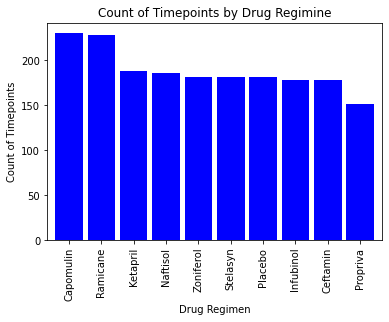

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.

y = study_df["Drug Regimen"].value_counts()
y.plot(kind="bar", figsize=(6,4), color = "b", alpha=1, width=0.85, rot=90)
plt.title("Count of Timepoints by Drug Regimine")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Timepoints")
plt.show()


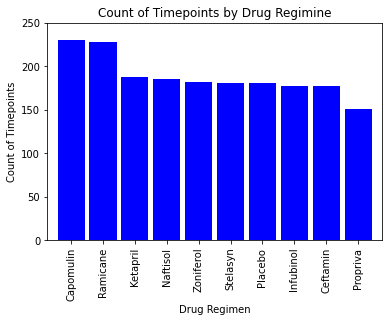

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pyplot.
y = study_df["Drug Regimen"].value_counts()
x = np.arange(len(y))

plt.bar(x, y, color='b', alpha=1, align="center", width=0.85)
plt.title("Count of Timepoints by Drug Regimine")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Timepoints")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)

tick_locations = x
tick_labels = y.index.values
plt.xticks(rotation=90)
plt.xticks(tick_locations, tick_labels)

plt.show()

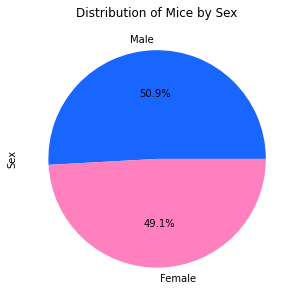

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
y = study_df["Sex"].value_counts()
y.plot(kind="pie", figsize=(7,5), autopct="%1.1f%%",colors=["#1966FF","#FF80BF"])
plt.title("Distribution of Mice by Sex")
plt.show()

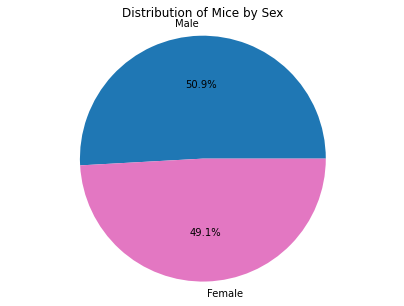

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = study_df["Sex"].unique()
values = study_df["Sex"].value_counts()
colors = ["tab:blue", "tab:pink"]

plt.figure(figsize=(7,5))

plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%")

plt.axis("equal")

plt.title("Distribution of Mice by Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
#To get the required data I have locked the original dataframe to the require Drug Regime
#filter Timepoint in descending order and then drop duplicate mice whilst keeping the first value
#this gives the maximum timepoint for each mouse

tumor_vol = study_df.loc[(study_df["Drug Regimen"] == "Capomulin") |
                     (study_df["Drug Regimen"] == "Ramicane") | 
                     (study_df["Drug Regimen"] == "Ceftamin") |
                     (study_df["Drug Regimen"] == "Infubinol"), :]

tumor_vol = tumor_vol.sort_values("Timepoint", ascending = False)


tumor_vol = tumor_vol.drop_duplicates(subset="Mouse ID", keep='first')

#check filtered data

tumor_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_tumoravg = tumor_vol.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

print(regimen_tumoravg)
print("")
print("-----------------------------------------")
print("")

tumor_vol.sort_values("Drug Regimen")

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_vol['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print("IQR = " + str(iqr))
print("Lower Quart = " + str(lower))
print("Upper Quart = " + str(upper))
print("Median = " + str(quartiles[0.5]))

bound1 = lower - (1.5*iqr)
bound2 = upper + (1.5*iqr)

print("Any values below " + str(bound1) + " and above " + str(bound2) + " could be outliers.")



Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ramicane     36.191390
Name: Tumor Volume (mm3), dtype: float64

-----------------------------------------

IQR = 22.742517952499995
Lower Quart = 37.1877438025
Upper Quart = 59.930261755
Median = 45.0
Any values below 3.0739668737500097 and above 94.04403868374999 could be outliers.


In [16]:
# divide data between the different Drug Regimens

Ramicane = tumor_vol.loc[tumor_vol['Drug Regimen'] == 'Ramicane']
Capomulin = tumor_vol.loc[tumor_vol['Drug Regimen'] == 'Capomulin']
Infubinol = tumor_vol.loc[tumor_vol['Drug Regimen'] == 'Infubinol']
Ceftamin = tumor_vol.loc[tumor_vol['Drug Regimen'] == 'Ceftamin']

In [17]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = Ramicane['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print("Ramicane")
print("IQR = " + str(iqr))
print("Lower Quart = " + str(lower))
print("Upper Quart = " + str(upper))
print("Median = " + str(quartiles[0.5]))


bound1 = lower - (1.5*iqr)
bound2 = upper + (1.5*iqr)

print("Any values below " + str(bound1) + " and above " + str(bound2) + " could be outliers.")
print("")
print("-----------------------------------------")
print("")

quartiles = Capomulin['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print("Capomulin")
print("IQR = " + str(iqr))
print("Lower Quart = " + str(lower))
print("Upper Quart = " + str(upper))
print("Median = " + str(quartiles[0.5]))


bound1 = lower - (1.5*iqr)
bound2 = upper + (1.5*iqr)

print("Any values below " + str(bound1) + " and above " + str(bound2) + " could be outliers.")
print("")
print("-----------------------------------------")
print("")

quartiles = Infubinol['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print("Infubinol")
print("IQR = " + str(iqr))
print("Lower Quart = " + str(lower))
print("Upper Quart = " + str(upper))
print("Median = " + str(quartiles[0.5]))


bound1 = lower - (1.5*iqr)
bound2 = upper + (1.5*iqr)

print("Any values below " + str(bound1) + " and above " + str(bound2) + " could be outliers.")
print("")
print("-----------------------------------------")
print("")

quartiles = Ceftamin['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print("Ceftamin")
print("IQR = " + str(iqr))
print("Lower Quart = " + str(lower))
print("Upper Quart = " + str(upper))
print("Median = " + str(quartiles[0.5]))


bound1 = lower - (1.5*iqr)
bound2 = upper + (1.5*iqr)

print("Any values below " + str(bound1) + " and above " + str(bound2) + " could be outliers.")

Ramicane
IQR = 9.098536719999998
Lower Quart = 31.56046955
Upper Quart = 40.65900627
Median = 36.56165229
Any values below 17.912664470000003 and above 54.30681135 could be outliers.

-----------------------------------------

Capomulin
IQR = 7.781863460000004
Lower Quart = 32.37735684
Upper Quart = 40.1592203
Median = 38.1251644
Any values below 20.70456164999999 and above 51.83201549 could be outliers.

-----------------------------------------

Infubinol
IQR = 11.477135160000003
Lower Quart = 54.04860769
Upper Quart = 65.52574285
Median = 60.16518046
Any values below 36.83290494999999 and above 82.74144559000001 could be outliers.

-----------------------------------------

Ceftamin
IQR = 15.577752179999997
Lower Quart = 48.72207785
Upper Quart = 64.29983003
Median = 59.85195552
Any values below 25.355449580000002 and above 87.66645829999999 could be outliers.


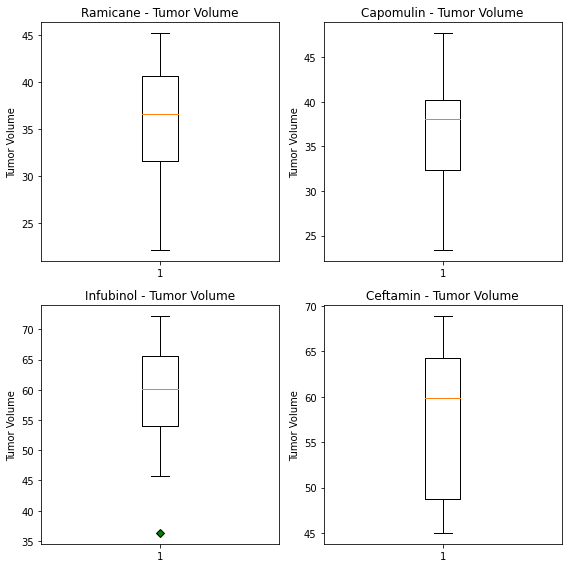

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
green_diamond = dict(markerfacecolor='g', marker='D')
axs[0, 0].boxplot(Ramicane['Tumor Volume (mm3)'], flierprops=green_diamond)
axs[0, 0].set_title('Ramicane - Tumor Volume')
axs[0, 0].set_ylabel('Tumor Volume')
axs[0, 1].boxplot(Capomulin['Tumor Volume (mm3)'], flierprops=green_diamond)
axs[0, 1].set_title('Capomulin - Tumor Volume')
axs[0, 1].set_ylabel('Tumor Volume')
axs[1, 0].boxplot(Infubinol['Tumor Volume (mm3)'], flierprops=green_diamond)
axs[1, 0].set_title('Infubinol - Tumor Volume')
axs[1, 0].set_ylabel('Tumor Volume')
axs[1, 1].boxplot(Ceftamin['Tumor Volume (mm3)'], flierprops=green_diamond)
axs[1, 1].set_title('Ceftamin - Tumor Volume')
axs[1, 1].set_ylabel('Tumor Volume')

plt.tight_layout()

plt.show()


In [19]:
#identify the outlier in the Infubinol Regimen

Infubinol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
637,c139,Infubinol,Male,11,28,45,72.226731,2
834,f345,Infubinol,Male,23,26,45,60.918767,1
1053,k483,Infubinol,Female,20,30,45,66.196912,3
540,a685,Infubinol,Male,8,30,45,66.083066,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
949,i386,Infubinol,Female,23,29,40,67.289621,4


In [20]:
#print outlier

print("")
print("only one outlier identified = Infubinol - Mouse: c326 ")


only one outlier identified = Infubinol - Mouse: c326 


## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify mouse ID
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
134,r554,Capomulin,Female,8,17,45,32.377357,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
104,u364,Capomulin,Male,18,17,45,31.023923,3
164,t565,Capomulin,Female,20,17,45,34.455298,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
282,l897,Capomulin,Male,17,19,45,38.846876,1
299,b742,Capomulin,Male,7,21,45,38.939633,0
224,w914,Capomulin,Male,24,21,45,36.041047,2


In [22]:
#filter to specific mouse

i738 = study_df.loc[study_df['Mouse ID'] == 'i738']

i738

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0
199,i738,Capomulin,Female,23,20,20,38.531136,0
200,i738,Capomulin,Female,23,20,25,34.973438,0
201,i738,Capomulin,Female,23,20,30,35.578780,1
202,i738,Capomulin,Female,23,20,35,36.175953,1
203,i738,Capomulin,Female,23,20,40,36.843898,2
204,i738,Capomulin,Female,23,20,45,37.311846,2


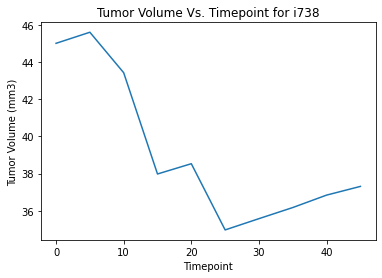

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

timepoint = i738["Timepoint"]
tumor_volume = i738["Tumor Volume (mm3)"]

i738_line, = plt.plot(timepoint, tumor_volume)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Vs. Timepoint for i738')
plt.show()

## Correlation and Regression

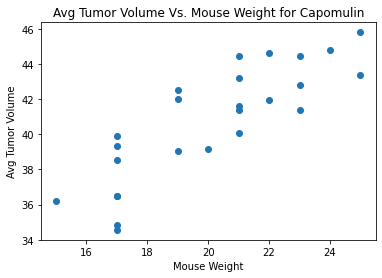

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = study_df.loc[study_df['Drug Regimen'] == 'Capomulin']

mouse_weight = Capomulin.groupby(Capomulin["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin.groupby(Capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Volume")
plt.title("Avg Tumor Volume Vs. Mouse Weight for Capomulin")
plt.show()

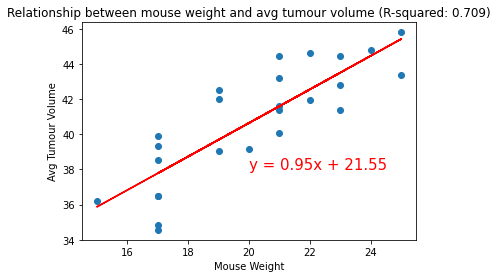

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress
x_values = mouse_weight
y_values = tumor_volume

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight,tumor_volume)
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumour Volume")
plt.title(f"Relationship between mouse weight and avg tumour volume (R-squared: {round(rvalue**2, 3)})")
plt.show()

In [26]:
# Compute correlation and print
corr_1, _ = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between mouse weight and average tumour volume is {round(corr_1, 2)}")


The correlation between mouse weight and average tumour volume is 0.84
